<a href="https://colab.research.google.com/github/NP-15/Deep-Learning/blob/main/Lab-04%3A%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


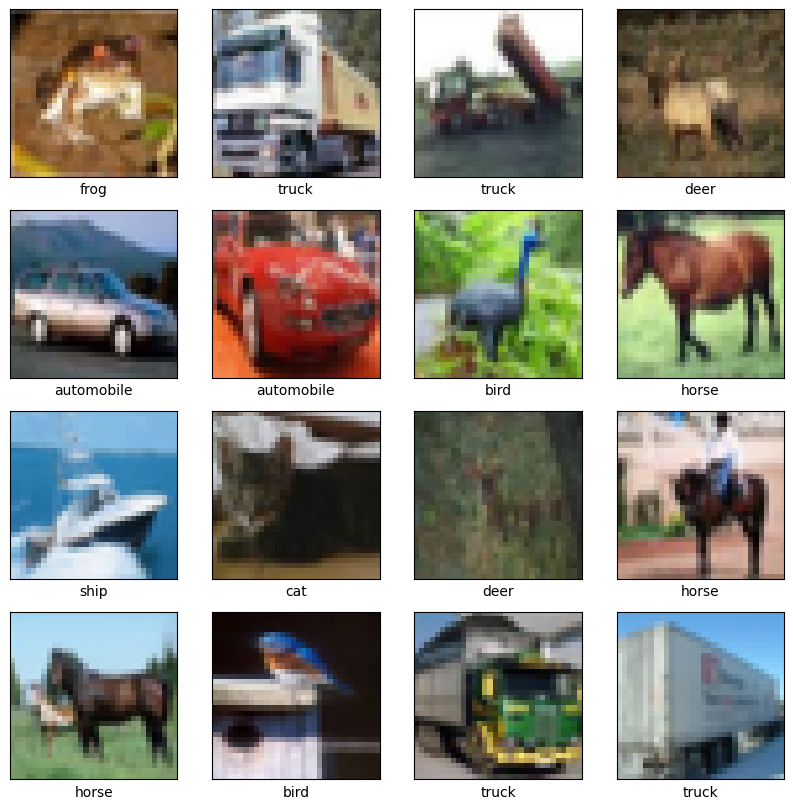

In [3]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot some sample images from the training set (optional)
plt.figure(figsize=(10,10))
for i in range(16):
 plt.subplot(4, 4, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10)
])

# Display the model's architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 70ms/step - accuracy: 0.3472 - loss: 1.7665 - val_accuracy: 0.5552 - val_loss: 1.2685
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 50ms/step - accuracy: 0.5807 - loss: 1.1797 - val_accuracy: 0.6270 - val_loss: 1.0572
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.6428 - loss: 1.0195 - val_accuracy: 0.6521 - val_loss: 0.9928
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.6799 - loss: 0.9108 - val_accuracy: 0.6816 - val_loss: 0.9197
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.7009 - loss: 0.8433 - val_accuracy: 0.6688 - val_loss: 0.9411
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7248 - loss: 0.7872 - val_accuracy: 0.6813 - val_loss: 0.9076
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.7442 - loss: 0.7271 - val_accuracy: 0.6954 - val_loss: 0.8817
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 64ms/step - accuracy: 0.755

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 7s - 23ms/step - accuracy: 0.7139 - loss: 0.8593
Test accuracy: 0.7139000296592712


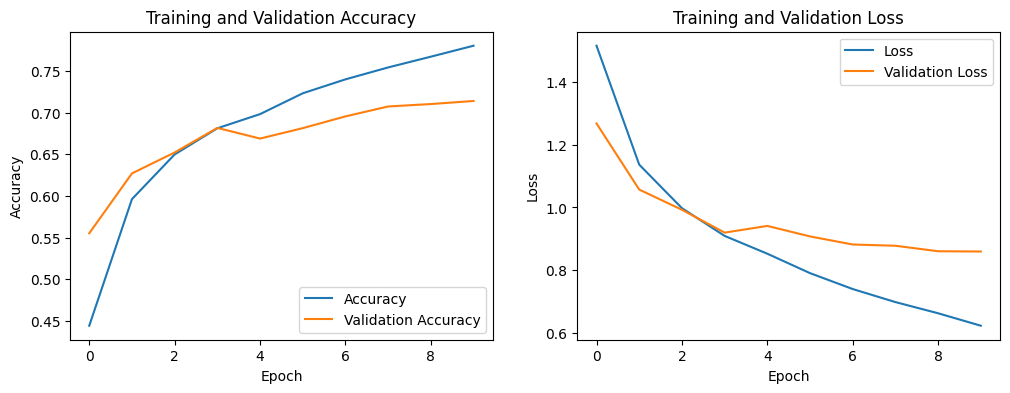

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Predict class labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
class_report = classification_report(test_labels, predicted_labels,
target_names=class_names)
print("Classification Report:")
print(class_report)

# Precision, Recall, F1-Score
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.71      0.74      1000
  automobile       0.84      0.85      0.84      1000
        bird       0.62      0.60      0.61      1000
         cat       0.53      0.54      0.53      1000
        deer       0.72      0.60      0.65      1000
         dog       0.54      0.70      0.61      1000
        frog       0.77      0.81      0.79      1000
       horse       0.72      0.78      0.75      1000
        ship       0.84      0.81      0.82      1000
       truck       0.85      0.75      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.72     10000
weighted avg       0.72      0.71      0.72     10000

Precision: 0.7213
Recall (Sensitivity): 0.7139
F1-Score: 0.7154


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


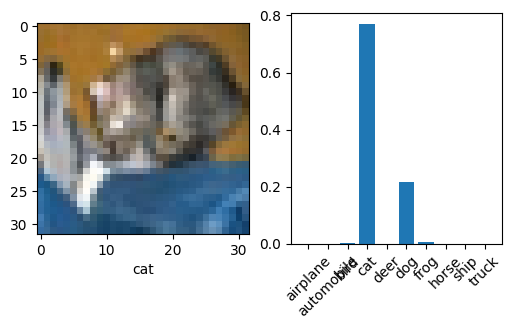

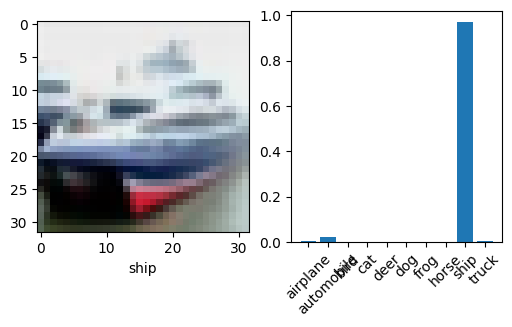

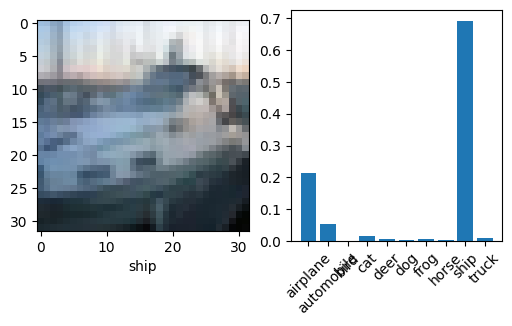

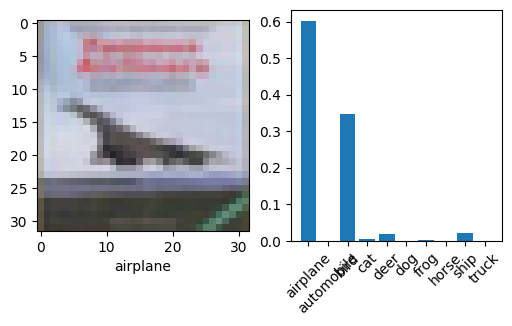

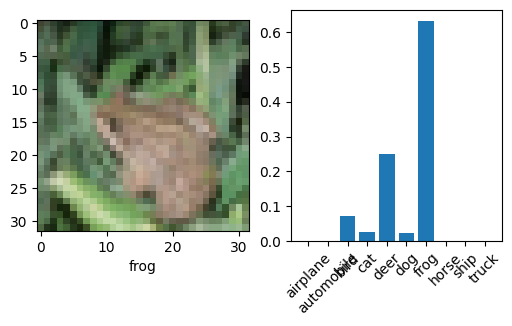

In [10]:
# Get predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Display predictions for the first 5 images
for i in range(5):
 plt.figure(figsize=(6,3))
 plt.subplot(1, 2, 1)
 plt.imshow(test_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[test_labels[i][0]])
 plt.subplot(1, 2, 2)
 plt.bar(range(10), predictions[i])
 plt.xticks(range(10), class_names, rotation=45)
 plt.show()

## Q1

In [18]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Reshape((4, 4, 16)),  # Reshape the output to match the input expected by Conv2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10)  # Output layer
])

# Display the model's architecture
model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 2, 2, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,570 (1.26 MB)

 Trainable params: 330,570 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 76ms/step - accuracy: 0.3400 - loss: 1.7750 - val_accuracy: 0.5381 - val_loss: 1.2694
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.5763 - loss: 1.1904 - val_accuracy: 0.6171 - val_loss: 1.0855
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.6408 - loss: 1.0184 - val_accuracy: 0.6322 - val_loss: 1.0418
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6768 - loss: 0.9145 - val_accuracy: 0.6708 - val_loss: 0.9431
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7083 - loss: 0.8249 - val_accuracy: 0.6786 - val_loss: 0.9109
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.7355 - loss: 0.7439 - val_accuracy: 0.6709 - val_loss: 0.9565
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7631 - loss: 0.6700 - val_accuracy: 0.6925 - val_loss: 0.9131
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.785

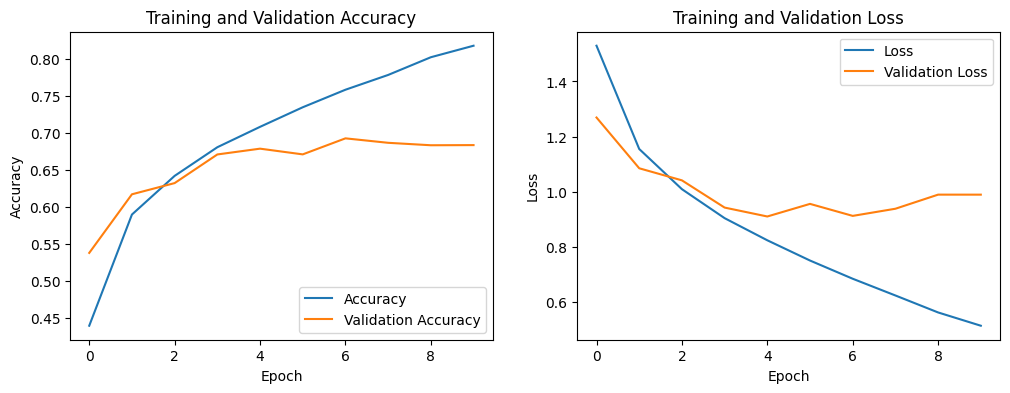

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# Predict class labels for the test set
predictions = model2.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
class_report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

# Precision, Recall, F1-Score
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.71      0.70      1000
  automobile       0.87      0.74      0.80      1000
        bird       0.61      0.58      0.59      1000
         cat       0.44      0.55      0.49      1000
        deer       0.73      0.57      0.64      1000
         dog       0.60      0.57      0.58      1000
        frog       0.75      0.75      0.75      1000
       horse       0.78      0.71      0.74      1000
        ship       0.71      0.87      0.78      1000
       truck       0.74      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

Precision: 0.6922
Recall (Sensitivity): 0.6834
F1-Score: 0.6845


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


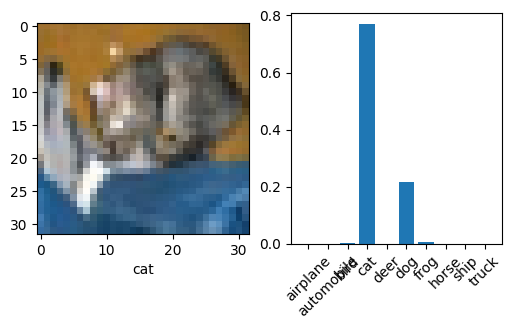

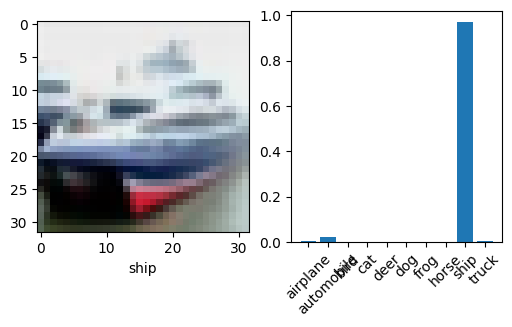

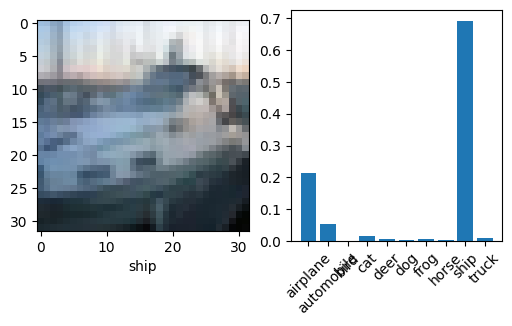

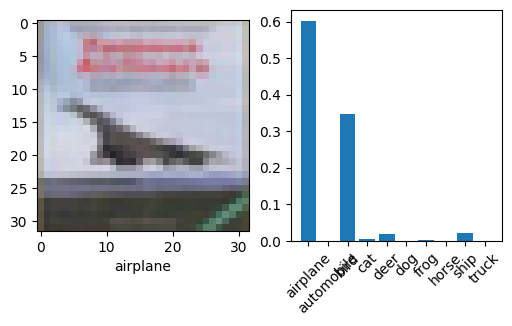

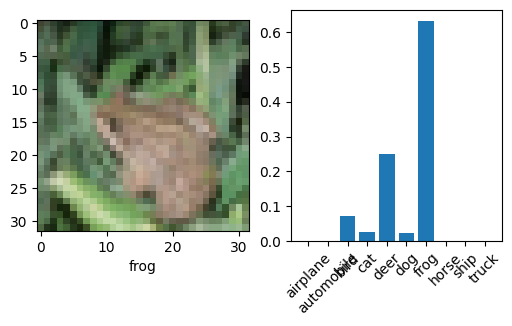

In [22]:
# Get predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Display predictions for the first 5 images
for i in range(5):
 plt.figure(figsize=(6,3))
 plt.subplot(1, 2, 1)
 plt.imshow(test_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[test_labels[i][0]])
 plt.subplot(1, 2, 2)
 plt.bar(range(10), predictions[i])
 plt.xticks(range(10), class_names, rotation=45)
 plt.show()

## Q2

In [24]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.Flatten(),
    layers.Dense(256, activation='tanh'),
    layers.Reshape((4, 4, 16)),  # Reshape the output to match the input expected by Conv2D
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.Flatten(),
    layers.Dense(10)  # Output layer
])

# Display the model's architecture
model3.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 2, 2, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,570 (1.26 MB)

 Trainable params: 330,570 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history3 = model3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 65ms/step - accuracy: 0.4156 - loss: 1.6265 - val_accuracy: 0.5824 - val_loss: 1.1962
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.5963 - loss: 1.1484 - val_accuracy: 0.6414 - val_loss: 1.0342
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 53ms/step - accuracy: 0.6621 - loss: 0.9765 - val_accuracy: 0.6616 - val_loss: 0.9836
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 54ms/step - accuracy: 0.6942 - loss: 0.8714 - val_accuracy: 0.6728 - val_loss: 0.9504
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.7310 - loss: 0.7793 - val_accuracy: 0.6820 - val_loss: 0.9423
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 54ms/step - accuracy: 0.7500 - loss: 0.7206 - val_accuracy: 0.6732 - val_loss: 0.9763
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.7728 - loss: 0.6534 - val_accuracy: 0.6850 - val_loss: 0.9721
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0

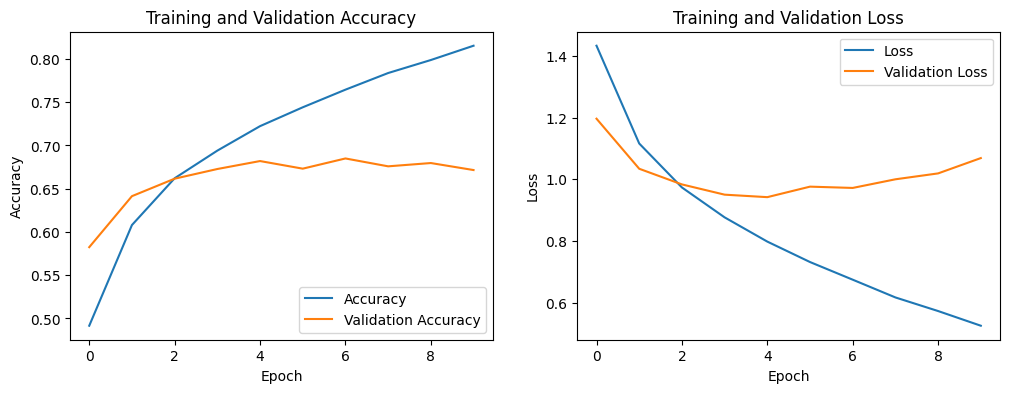

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
# Predict class labels for the test set
predictions = model3.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
class_report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

# Precision, Recall, F1-Score
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.70      0.70      1000
  automobile       0.79      0.80      0.79      1000
        bird       0.60      0.52      0.56      1000
         cat       0.51      0.48      0.49      1000
        deer       0.58      0.69      0.63      1000
         dog       0.67      0.48      0.56      1000
        frog       0.65      0.82      0.72      1000
       horse       0.82      0.66      0.73      1000
        ship       0.72      0.82      0.76      1000
       truck       0.70      0.76      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

Precision: 0.6741
Recall (Sensitivity): 0.6716
F1-Score: 0.6679


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


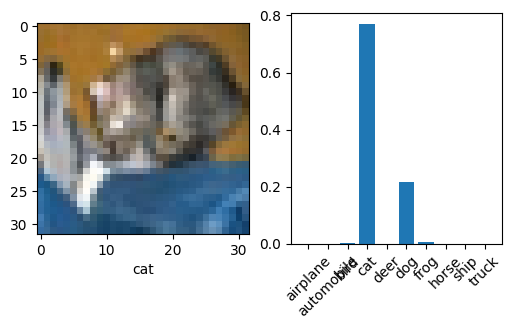

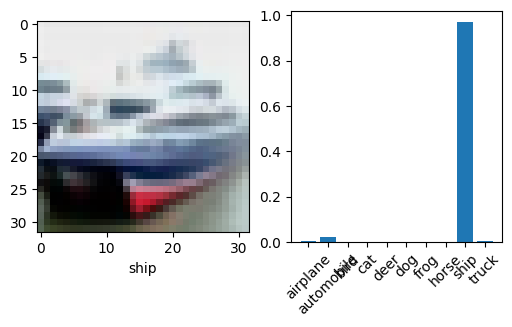

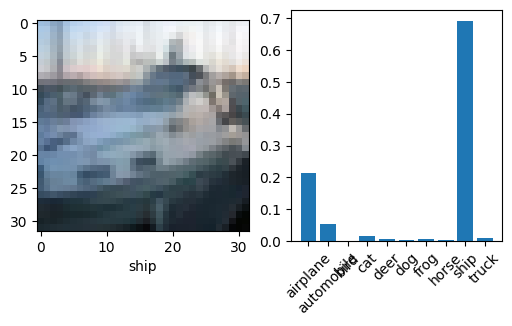

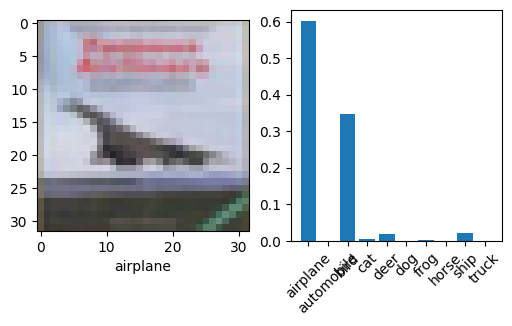

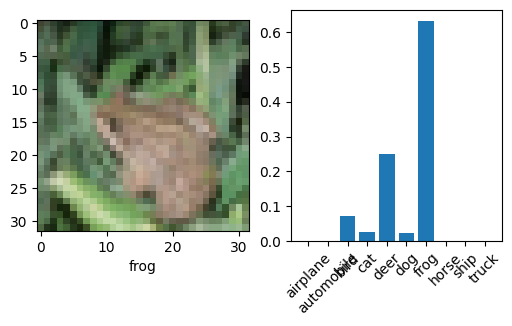

In [28]:
# Get predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Display predictions for the first 5 images
for i in range(5):
 plt.figure(figsize=(6,3))
 plt.subplot(1, 2, 1)
 plt.imshow(test_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[test_labels[i][0]])
 plt.subplot(1, 2, 2)
 plt.bar(range(10), predictions[i])
 plt.xticks(range(10), class_names, rotation=45)
 plt.show()